# Import and Setup

In [125]:
import datetime as dt
import pandas as pd
import numpy as np
import glob
from matplotlib.ticker import MultipleLocator
from pynverse import inversefunc
import datetime as dt

In [126]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [127]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [128]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

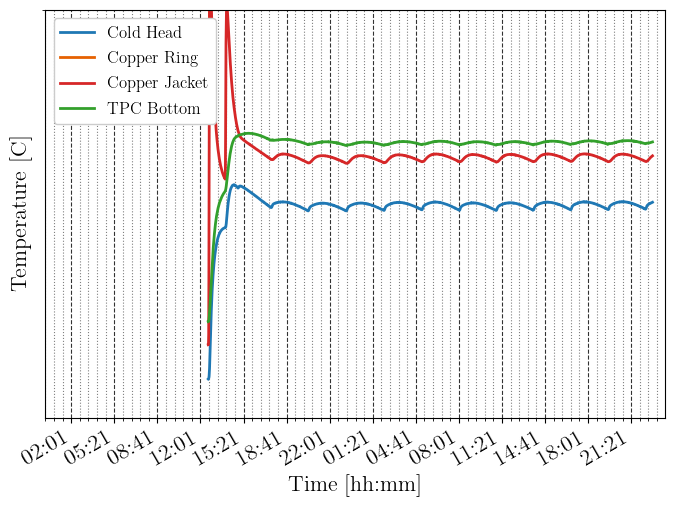

In [129]:
Sensors = []
Files = ['C:/Data/StandStatus/20220914.h5','C:/Data/StandStatus/20220915.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2022,9,14,0,00), dt.datetime(2022,9,15,23,59)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=200, YTicks=20, XRange=XRange, YRange=[25,30], Bin=120)

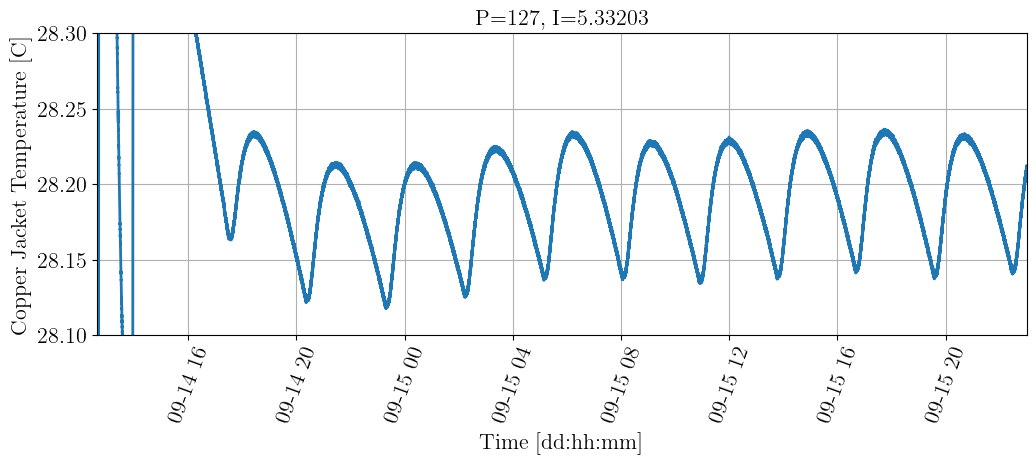

In [130]:
temperature_1=[]

time_1=[]
for vals in AllSensors.Time:
    time_1.append(vals)
for values in AllSensors.Temp[2]:
    temperature_1.append(values)


plt.figure(figsize=(12,4))

plt.ylim(28.1,28.3)
plt.plot(time_1,temperature_1)
plt.grid()
plt.xlabel('Time [dd:hh:mm]')
plt.ylabel('Copper Jacket Temperature [C]')
plt.xticks(rotation=70)
plt.title('P=127, I=5.33203')
plt.savefig('PID_tuning_P_127.pdf')
plt.show()

In [131]:
print(len(time_))

690808


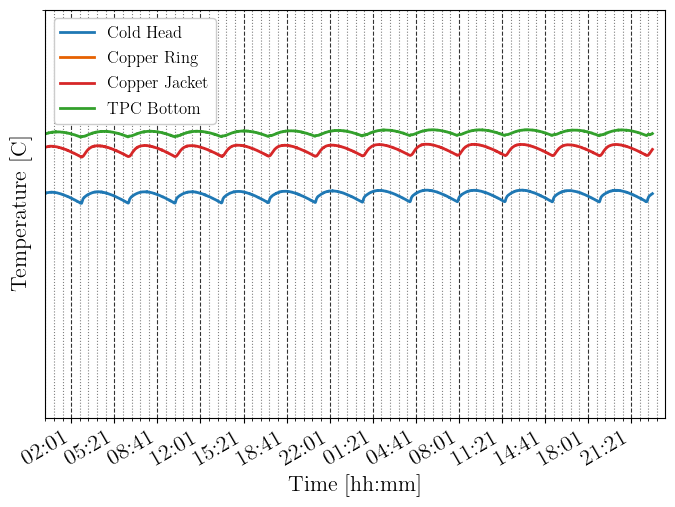

In [132]:
Sensors = []
Files = ['C:/Data/StandStatus/20220917.h5','C:/Data/StandStatus/20220918.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2022,9,17,0,00), dt.datetime(2022,9,18,23,59)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=200, YTicks=20, XRange=XRange, YRange=[25,30], Bin=120)

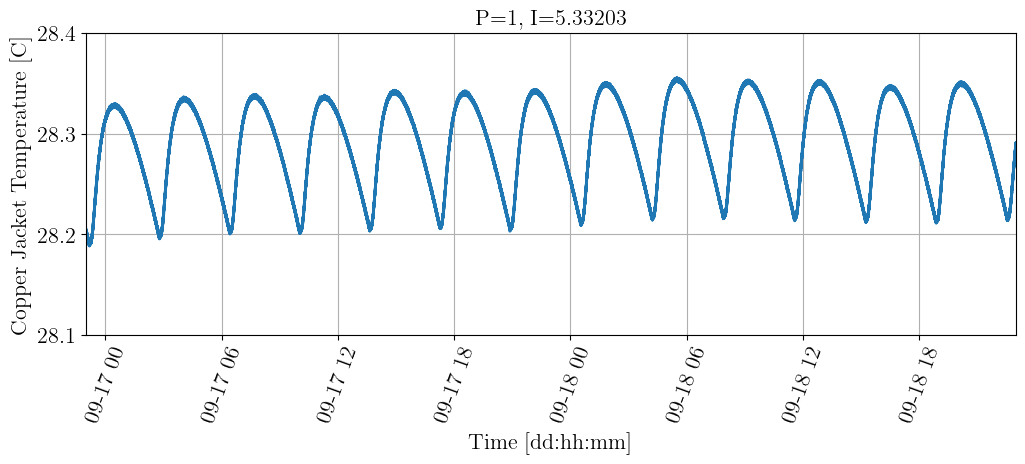

In [133]:
temperature_2=[]

time_2=[]
for vals in AllSensors.Time:
    time_2.append(vals)
for values in AllSensors.Temp[2]:
    temperature_2.append(values)


plt.figure(figsize=(12,4))

plt.ylim(28.1,28.4)
plt.plot(time_2,temperature_2)
plt.grid()
plt.xlabel('Time [dd:hh:mm]')
plt.ylabel('Copper Jacket Temperature [C]')
plt.xticks(rotation=70)
plt.title('P=1, I=5.33203')
plt.savefig('PID_tuning_P_1.pdf')
plt.show()

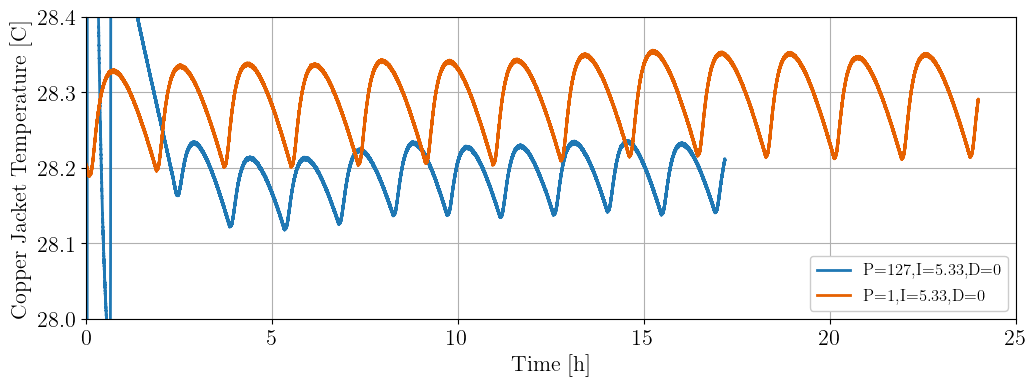

In [134]:

plt.figure(figsize=(12,4))
plt.ylim(28,28.4)
plt.plot(np.linspace(0,len(time_1),len(time_1))/(2*60*60*2),temperature_1,label='P=127,I=5.33,D=0')
plt.plot(np.linspace(0,len(time_2),len(time_2))/(2*60*60*2),temperature_2,label='P=1,I=5.33,D=0')
plt.grid()
plt.xlabel('Time [h]')
plt.ylabel('Copper Jacket Temperature [C]')
# plt.xticks(rotation=70)
# plt.title('P=1, I=5.33203')
plt.legend(loc='best')
plt.savefig('PID_comparison.pdf')
plt.show()